In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Classifying Clothes

In [2]:
fashion_mnist = keras.datasets.fashion_mnist #loading dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

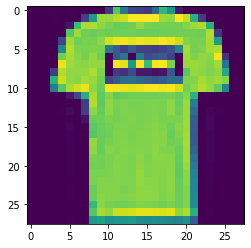

In [3]:
plt.imshow(X_train_full[1]) #access the second image, they are greyscale

In [4]:
y_train_full[1] #numerical values stand for shirt, pants, pullover, dress etc

0

In [5]:
class_names = ['T-Shirt/Top' , 
              'Pants',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle Boot']

In [6]:
class_names[y_train_full[10]]

'T-Shirt/Top'

In [7]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Normalization

In [8]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

# Spliting the data

In [9]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [10]:
X_valid[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

## Create the model architechture

# Sequential

In [11]:
np.random.seed(42) #Generates random seed, will help reproduce the same result, using the same initial weight
tf.random.set_seed(42)

# Relu Activation (classification models)

In [12]:
model = keras.models.Sequential() #Creating a model
model.add(keras.layers.Flatten(input_shape = [28,28])) #2d arrays, (images), input layer
model.add(keras.layers.Dense(300, activation='relu')) #300 = number of nodes/neurons, hidden layer 1
model.add(keras.layers.Dense(100, activation='relu')) #hidden layer 2
model.add(keras.layers.Dense(10, activation= 'softmax')) #output layer, 10 neurons = 10 different categories (use softmax because categories are exclusive)

In [13]:
model.summary() #summary of model 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


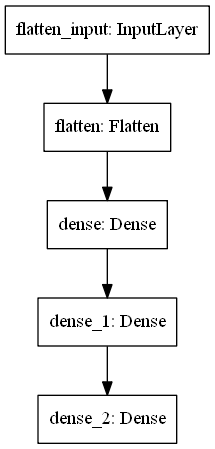

In [14]:
import pydot
keras.utils.plot_model(model) #visualize model, structure only

### Access parameters by using get_weight() method

In [15]:
weights, biases = model.layers[1].get_weights() #change layer by changing 1

In [16]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', #since we have labels
             optimized = 'sgd', #sochastic gradient discent, perform backpropagation
             metrics = ['accuracy']) #since we are building a classifier
#training our data

In [21]:
model_history = model.fit(X_train, y_train, epochs = 50,
                         validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 4s 73us/sample - loss: 0.5052 - accuracy: 0.8178 - val_loss: 0.4048 - val_accuracy: 0.8544
Epoch 2/50
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3909 - accuracy: 0.8621 - val_loss: 0.4274 - val_accuracy: 0.8520
Epoch 3/50
55000/55000 [==============================] - 3s 61us/sample - loss: 0.3679 - accuracy: 0.8728 - val_loss: 0.3703 - val_accuracy: 0.8772
Epoch 4/50
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3562 - accuracy: 0.8765 - val_loss: 0.4013 - val_accuracy: 0.8730
Epoch 5/50
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3445 - accuracy: 0.8805 - val_loss: 0.4130 - val_accuracy: 0.8748
Epoch 6/50
55000/55000 [==============================] - 3s 61us/sample - loss: 0.3378 - accuracy: 0.8846 - val_loss: 0.4294 - val_accuracy: 0.8796
Epoch 7/50
55000/55000 [==============================] -

In [22]:
model_history.params

{'batch_size': 32,
 'epochs': 50,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [23]:
model_history.history

{'loss': [0.5051536282745275,
  0.39093565612381154,
  0.3678506647521799,
  0.35615550963987,
  0.3444851202076132,
  0.33783539353175596,
  0.33309099962711336,
  0.32499991015087476,
  0.3184491891579195,
  0.31581443383476954,
  0.3110910810199651,
  0.3090854500152848,
  0.3009380977484313,
  0.3043457207083702,
  0.3000828681349754,
  0.2898053819986907,
  0.28876498615145685,
  0.2838718099431558,
  0.28802490789131685,
  0.2855336656126109,
  0.2773342742573131,
  0.27666857970546593,
  0.2795705258916725,
  0.2728293062147769,
  0.27187172935225745,
  0.263888945066387,
  0.26450987276976756,
  0.2636622592974793,
  0.25715795383995227,
  0.25874348070404746,
  0.25831406537456947,
  0.2563902450179512,
  0.25365473038066516,
  0.24795042083398863,
  0.2502367720563303,
  0.2425633976673538,
  0.25518042704043065,
  0.23987123123813758,
  0.24712579450498928,
  0.2452238597509536,
  0.24179844395464117,
  0.23350266105309128,
  0.23529686788699844,
  0.2374650387341326,
  0.22

## Visualizing

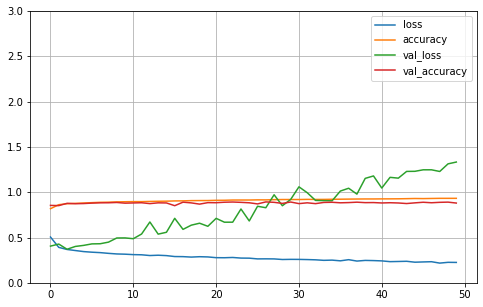

In [24]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.2011004232764244, 0.8703]

In [26]:
X_new = X_test[:3]

In [27]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Pants'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


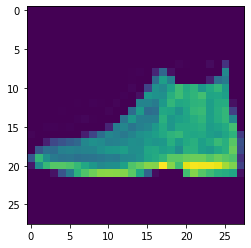

In [30]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


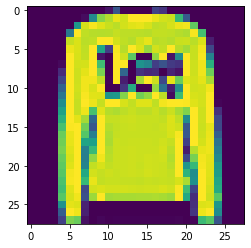

In [31]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


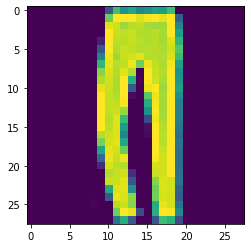

In [32]:
print(plt.imshow(X_test[2]))